<a href="https://colab.research.google.com/github/Mboubaker/Lidar_Evidential_occupancy_grid_mapping-/blob/main/semantic_Occupancy_grid_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carte d'occupation sémantique**

Pour un robot mobile, une carte d'occupation sémantique serait une représentation de son environnement qui incorpore des informations sémantiques pour aider le robot à naviguer, interagir et prendre des décisions en fonction de la signification des objets et des entités dans son environnement. Voici quelques éléments spécifiques qui pourraient être inclus dans une telle carte :

  - Localisation des obstacles et des obstacles significatifs: Plutôt que de simplement indiquer la présence d'obstacles physiques, la carte pourrait fournir des informations sur la signification de ces obstacles. Par exemple, un mur pourrait être différencié d'une personne ou d'un meuble.

  - Zones d'intérêt et d'activité: La carte pourrait identifier les zones où le robot est susceptible de trouver des activités spécifiques. Par exemple, une cuisine, une salle de séjour, une zone de travail, etc.

  - Régions accessibles et non accessibles: Les zones où le robot peut se déplacer en toute sécurité et celles qui sont hors de portée ou dangereuses peuvent être marquées différemment sur la carte.

  - Identification des points de repère: Les points de repère significatifs pour la navigation, tels que les portes, les fenêtres, les intersections, etc., pourraient être inclus pour aider le robot à se situer dans son environnement.

  - Informations contextuelles dynamiques: Des informations dynamiques telles que la position des personnes, des objets en mouvement, des sources de bruit, etc., pourraient être intégrées pour permettre au robot de réagir en temps réel à son environnement.


# **Implémentation**
**Code  :**

Ce code Python est conçu pour créer une carte d'occupation sémantique pour un robot mobile "JAGUAR". La carte d'occupation sémantique est une représentation de l'environnement du robot où chaque cellule de la carte est associée à des informations sémantiques telles que la présence d'obstacles, la position du robot, etc. Voici ce que fait ce code en lien avec la carte d'occupation sémantique pour le robot "JAGUAR" :

  - **Initialisation de la carte d'occupation :**
  Une nouvelle carte d'occupation est créée avec des dimensions de 200x200 pixels et 5 canaux pour représenter les informations sémantiques.

  - **Définition des régions spécifiques :**
   Des régions spécifiques de l'environnement du robot sont définies avec des coordonnées spatiales. Ces régions incluent la position du robot ("Robot") et la présence d'obstacles ("obstacle_mur gauche" et "obstacle_mur_droite").

  - **Attribution des valeurs aux cellules de la carte :**
  Les valeurs des cellules de la carte d'occupation sont attribuées en fonction des régions spécifiées. Par exemple, les cellules correspondant à la région du robot reçoivent une valeur spécifique indiquant la présence du robot, tandis que les cellules correspondant aux obstacles reçoivent une valeur indiquant la présence d'obstacles.

  - **Création d'une représentation visuelle de la carte d'occupation :**
  Le code utilise la bibliothèque Matplotlib pour créer une représentation visuelle de la carte d'occupation. Les différentes régions de la carte sont colorées différemment pour indiquer les différentes informations sémantiques (position du robot, obstacles, etc.).
  Une légende est ajoutée pour expliquer les couleurs utilisées dans la représentation visuelle.




**Scénario  :**

- Le milieu du robot est placé approximativement au milieu du couloir, près du milieu de position relative.
- Jaguar est au milieu du couloir à une hauteur de 0,25m.
- Segway Avancer de 3 mètres ,tourne à 180° et repartir


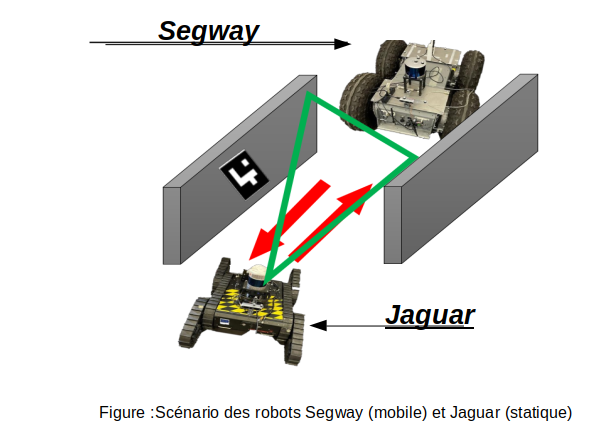

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import math
import csv
import os
from matplotlib.patches import Polygon
from matplotlib.patches import Rectangle
from google.colab import drive

#import mpld3
#!pip install mpld3
#import mplcursors
drive.mount('/content/drive',force_remount=True)
#lien dataset : https://drive.google.com/drive/folders/1npBoFebg8iXZyWqe0n0zADYeMIY1_OWp?usp=sharing

Mounted at /content/drive


In [2]:
#Les variables pour configurer la carte
DYNAMIC_THRESHOLD = 1
RESOLUTION = 0.1

In [3]:
dgm_file_path = '/content/drive/MyDrive/Data/ev_occ_jag1701090671.7403076.npy'
dgm_file_path1 = '/content/drive/MyDrive/Data/ev_occ_jag1701090683.7431726.npy'
dgm1 = np.load(dgm_file_path)
dgm2 = np.load(dgm_file_path1)
print(dgm1[64,99])

[0.3 0.7 0. ]


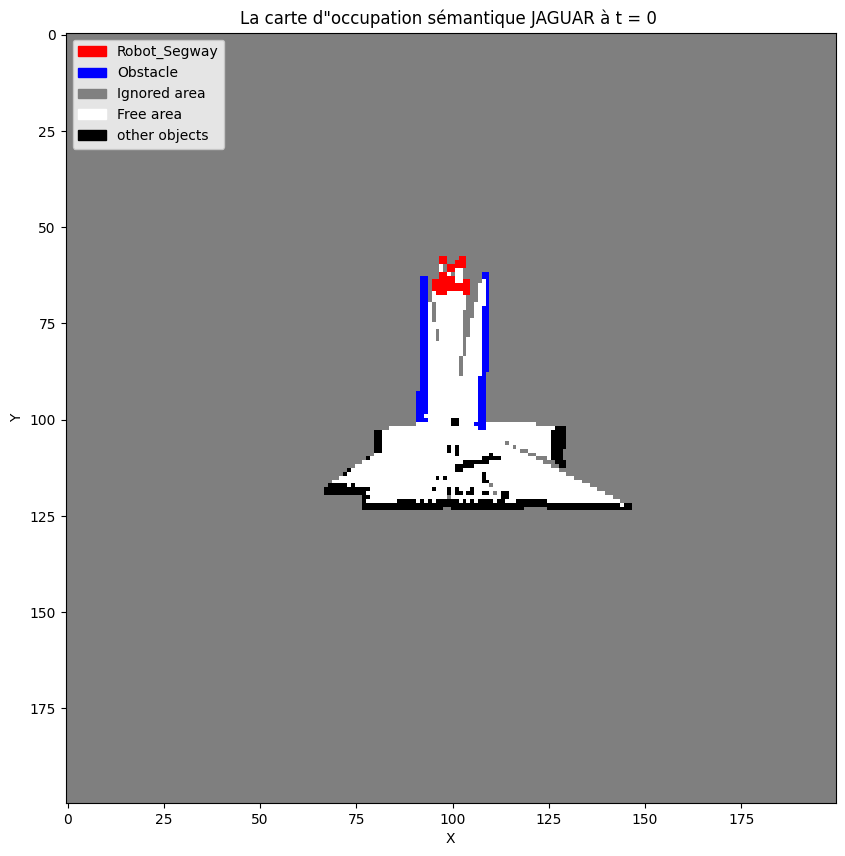

In [10]:
import numpy as np

new_dgm = np.zeros((200, 200, 5))  # Nouvelle carte d'occupation de 5 éléments de fonction de masse :  [ignorance, autre objets, liberté, Robot, Obstacle]

# Définir les régions spécifiées avec les valeurs des cellules correspondantes
regions = {
    "Robot": {"xmin": 56, "xmax": 68, "ymin": 94, "ymax": 105},
    "obstacle_mur": {"xmin": 60, "xmax": 102, "ymin": 89, "ymax": 94},
    "obstacle_mur1": {"xmin": 60, "xmax": 102, "ymin": 105, "ymax": 112}
}

# Appliquer les valeurs restantes de la carte d'occupation initiale à la nouvelle carte
for x in range(200):
    for y in range(200):
        cell_value = dgm1[x, y]  # Obtenir la valeur de la cellule dans la carte d'occupation initiale
        if np.array_equal(cell_value, np.array([0.3, 0.7, 0])):
            new_dgm[x, y] = np.append(cell_value, [0, 0])

# Parcourir chaque région spécifiée
for region_name, region_data in regions.items():
    # Extraire les coordonnées de la région
    xmin, xmax, ymin, ymax = region_data["xmin"], region_data["xmax"], region_data["ymin"], region_data["ymax"]

    # Parcourir chaque cellule de la région
    for x in range(xmin, xmax + 1):
        for y in range(ymin, ymax + 1):
            cell_value = new_dgm[x, y]  # Obtenir la valeur de la cellule dans la carte d'occupation initiale

            # Vérifier si la valeur de la cellule correspond à la condition spécifiée
            if np.array_equal(cell_value, np.array([0.3, 0.7, 0, 0, 0])):
                # Mettre à jour la valeur de la cellule dans la nouvelle carte d'occupation avec le label correspondant
                if region_name == "Robot":
                    new_dgm[x, y] = np.array([0.3, 0, 0, 0.7,0])  # Label pour la région "Robot"
                elif region_name == "obstacle_mur":
                    new_dgm[x, y] = np.array([0.3, 0, 0, 0,0.7])  # Label pour la région "obstacle_mur"
                elif region_name == "obstacle_mur1":
                    new_dgm[x, y] = np.array([0.3, 0, 0, 0,0.7])
# Appliquer les valeurs restantes de la carte d'occupation initiale à la nouvelle carte
for x in range(200):
    for y in range(200):
        cell_value = dgm1[x, y]  # Obtenir la valeur de la cellule dans la carte d'occupation initiale
        if np.array_equal(cell_value, np.array([0.3, 0, 0.7])):
            new_dgm[x, y] = np.append(cell_value, [0, 0])

for x in range(200):
    for y in range(200):
        cell_value = dgm1[x, y]  # Obtenir la valeur de la cellule dans la carte d'occupation initiale
        if np.array_equal(cell_value, np.array([1, 0, 0])):
            new_dgm[x, y] = np.append(cell_value, [0,0])  # Autres valeurs avec une fonction de masse [0, 0, 0, 0]




# Afficher la nouvelle carte d'occupation
import matplotlib.pyplot as plt
import numpy as np

# Créer une matrice vide pour stocker les codes de couleur de chaque cellule
colors = np.zeros((new_dgm.shape[0], new_dgm.shape[1], 3), dtype=float)

# Définir les couleurs pour chaque type de cellule en fonction de leur fonction de masse
for i in range(new_dgm.shape[0]):
    for j in range(new_dgm.shape[1]):
        if np.array_equal(new_dgm[i, j], [0.3, 0, 0, 0.7, 0]):
            colors[i, j] = [1, 0, 0]    # Rouge pour Robot
        elif np.array_equal(new_dgm[i, j], [0.3, 0, 0, 0, 0.7]):
            colors[i, j] = [0, 0, 1]    # Bleu pour Obstacle
        elif np.array_equal(new_dgm[i, j], [1, 0, 0, 0,0]):
            colors[i, j] = [0.5, 0.5, 0.5]    # Gris pour Others
        elif np.array_equal(new_dgm[i, j], [0.3, 0, 0.7, 0, 0]):
            colors[i, j] = [1, 1, 1]    # Blanc pour Others
        elif np.array_equal(new_dgm[i, j], [0.3, 0.7, 0, 0, 0]):
            colors[i, j] = [0, 0, 0]    # Vert pour Others

import matplotlib.patches as mpatches

# Afficher la grille avec les couleurs attribuées à chaque type de cellule
plt.figure(figsize=(10, 10))
plt.imshow(colors)
plt.title('La carte d"occupation sémantique JAGUAR à t = 0 ')
plt.xlabel('X')
plt.ylabel('Y')

# Ajouter une légende pour les couleurs
# Ajouter une légende pour les couleurs
legend_patches = [
    mpatches.Patch(color='red', label='Robot_Segway'),
    mpatches.Patch(color='blue', label='Obstacle'),
    mpatches.Patch(color='gray', label='Ignored area '),
    mpatches.Patch(color='white', label='Free area'),
    mpatches.Patch(color='black', label='other objects')
]

plt.legend(handles=legend_patches, loc='upper left')
plt.show()



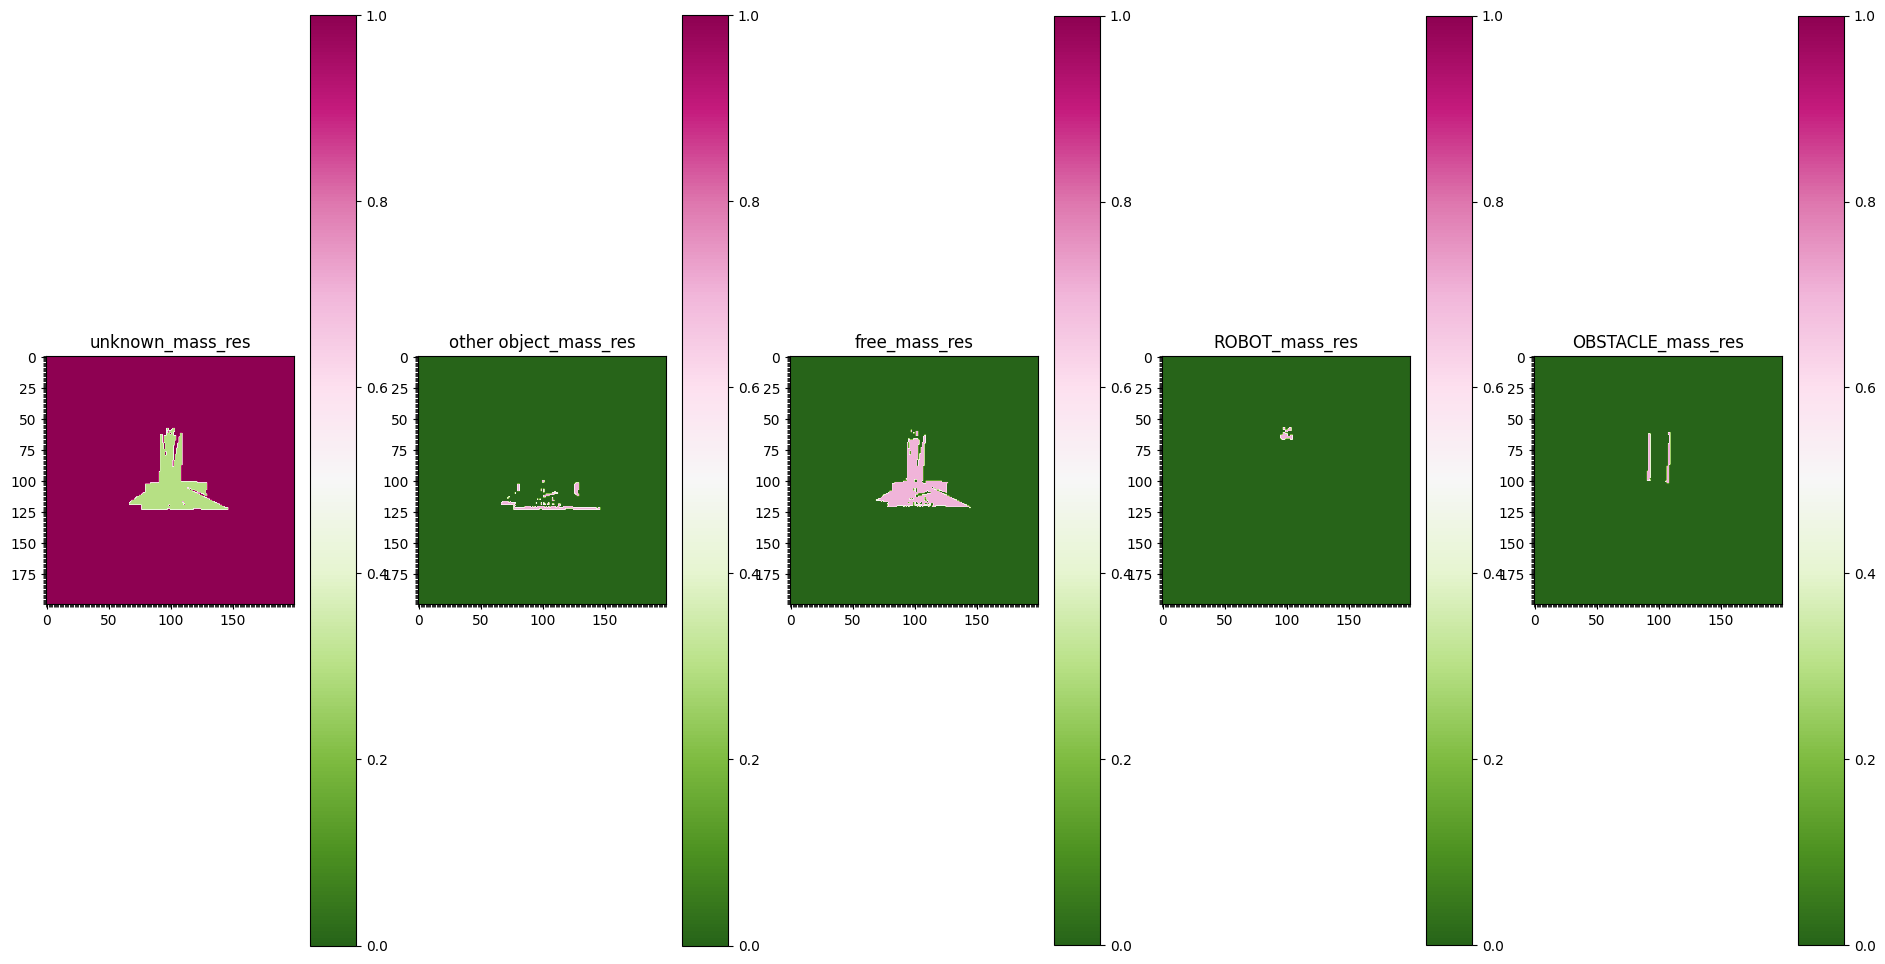

In [11]:
#Visualisation de chaque classe dans la carte d’occupation sémantique à t = 0


xy_res = np.array(new_dgm).shape
carte_11 = new_dgm[:, :, 0:1]
carte_12 = new_dgm[:, :, 1:2]
carte_13 = new_dgm[:, :, 2:3]
carte_14 = new_dgm[:, :, 3:4]
carte_15 = new_dgm[:, :, 4:5]

plt.figure(figsize=(28, 16))
plt.subplot(1, 6, 2)
plt.imshow(carte_11[:, :, 0], cmap="PiYG_r")
plt.title('unknown_mass_res')
plt.clim(0, 1)
plt.gca().set_xticks(np.arange(-.5, xy_res[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, xy_res[0], 1), minor=True)
plt.grid(True, which="major", color="b", linewidth=0.2, alpha=0)
plt.colorbar()

plt.subplot(1, 6, 3)
plt.imshow(carte_12[:, :, 0], cmap="PiYG_r")
plt.title('other object_mass_res')
plt.clim(0, 1)
plt.gca().set_xticks(np.arange(-.5, xy_res[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, xy_res[0], 1), minor=True)
plt.grid(True, which="major", color="b", linewidth=0.5, alpha=0)
plt.colorbar()

plt.subplot(1, 6, 4)
plt.imshow(carte_13[:, :, 0], cmap="PiYG_r")
plt.title('free_mass_res')
plt.clim(0, 1)
plt.gca().set_xticks(np.arange(-.5, xy_res[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, xy_res[0], 1), minor=True)
plt.grid(True, which="major", color="b", linewidth=0.8, alpha=0)
plt.colorbar()

plt.subplot(1, 6, 5)
plt.imshow(carte_14[:, :, 0], cmap="PiYG_r")
plt.title('ROBOT_mass_res')
plt.clim(0, 1)
plt.gca().set_xticks(np.arange(-.5, xy_res[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, xy_res[0], 1), minor=True)
plt.grid(True, which="major", color="b", linewidth=0.8, alpha=0)
plt.colorbar()

plt.subplot(1, 6, 6)
plt.imshow(carte_15[:, :, 0], cmap="PiYG_r")
plt.title('OBSTACLE_mass_res')
plt.clim(0, 1)
plt.gca().set_xticks(np.arange(-.5, xy_res[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, xy_res[0], 1), minor=True)
plt.grid(True, which="major", color="b", linewidth=0.8, alpha=0)
plt.colorbar()


[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]


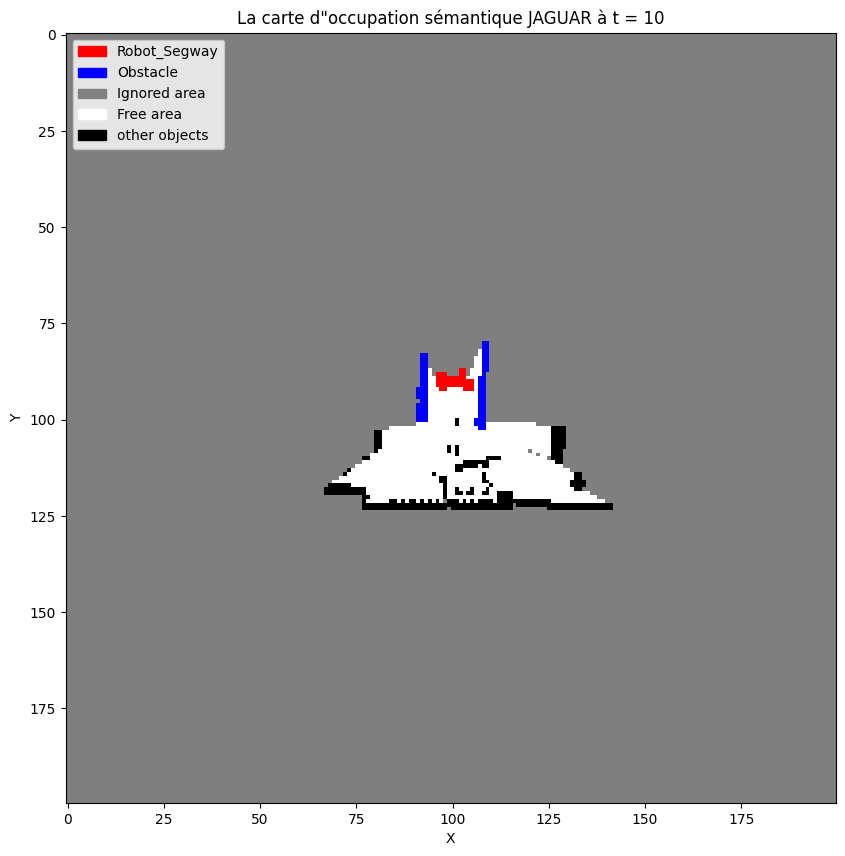

In [9]:
import numpy as np
import matplotlib.patches as mpatches

new_dgm2 = np.zeros((200, 200, 5))  # Nouvelle carte d'occupation de 5 éléments de fonction de masse : [ignorance, autre objets, liberté, Robot, Obstacle]

# Définir les régions spécifiées avec les valeurs des cellules correspondantes
regions = {
    "Robot": {"xmin": 86, "xmax": 94, "ymin": 95, "ymax": 105},
    "obstacle_mur": {"xmin": 80, "xmax": 102, "ymin": 89, "ymax": 94},
    "obstacle_mur1": {"xmin": 77, "xmax": 102, "ymin": 105, "ymax": 112}
}

# Appliquer les valeurs restantes de la carte d'occupation initiale à la nouvelle carte
for x in range(200):
    for y in range(200):
        cell_value = dgm2[x, y]  # Obtenir la valeur de la cellule dans la carte d'occupation initiale
        if np.array_equal(cell_value, np.array([0.3, 0.7, 0])):
            new_dgm2[x, y] = np.append(cell_value, [0, 0])

# Parcourir chaque région spécifiée
for region_name, region_data in regions.items():
    # Extraire les coordonnées de la région
    xmin, xmax, ymin, ymax = region_data["xmin"], region_data["xmax"], region_data["ymin"], region_data["ymax"]

    # Parcourir chaque cellule de la région
    for x in range(xmin, xmax + 1):
        for y in range(ymin, ymax + 1):
            cell_value = new_dgm2[x, y]  # Obtenir la valeur de la cellule dans la carte d'occupation initiale

            # Vérifier si la valeur de la cellule correspond à la condition spécifiée
            if np.array_equal(cell_value, np.array([0.3, 0.7, 0, 0, 0])):
                # Mettre à jour la valeur de la cellule dans la nouvelle carte d'occupation avec le label correspondant
                if region_name == "Robot":
                    new_dgm2[x, y] = np.array([0.3, 0, 0, 0.7,0])  # Label pour la région "Robot"
                elif region_name == "obstacle_mur":
                    new_dgm2[x, y] = np.array([0.3, 0, 0, 0,0.7])  # Label pour la région "obstacle_mur"
                elif region_name == "obstacle_mur1":
                    new_dgm2[x, y] = np.array([0.3, 0, 0, 0,0.7])
# Appliquer les valeurs restantes de la carte d'occupation initiale à la nouvelle carte
for x in range(200):
    for y in range(200):
        cell_value = dgm2[x, y]  # Obtenir la valeur de la cellule dans la carte d'occupation initiale
        if np.array_equal(cell_value, np.array([0.3, 0, 0.7])):
            new_dgm2[x, y] = np.append(cell_value, [0, 0])

for x in range(200):
    for y in range(200):
        cell_value = dgm2[x, y]  # Obtenir la valeur de la cellule dans la carte d'occupation initiale
        if np.array_equal(cell_value, np.array([1, 0, 0])):
            new_dgm2[x, y] = np.append(cell_value, [0,0])  # Autres valeurs avec une fonction de masse [0, 0, 0, 0]





# Afficher la nouvelle carte d'occupation
import matplotlib.pyplot as plt
import numpy as np

# Créer une matrice vide pour stocker les codes de couleur de chaque cellule
colors = np.zeros((new_dgm2.shape[0], new_dgm2.shape[1], 3), dtype=float)

# Définir les couleurs pour chaque type de cellule en fonction de leur fonction de masse
for i in range(new_dgm2.shape[0]):
    for j in range(new_dgm2.shape[1]):
        if np.array_equal(new_dgm2[i, j], [0.3, 0, 0, 0.7, 0]):
            colors[i, j] = [1, 0, 0]    # Rouge pour Robot
        elif np.array_equal(new_dgm2[i, j], [0.3, 0, 0, 0, 0.7]):
            colors[i, j] = [0, 0, 1]    # Bleu pour Obstacle
        elif np.array_equal(new_dgm2[i, j], [1, 0, 0, 0,0]):
            colors[i, j] = [0.5, 0.5, 0.5]    # Gris pour Others
        elif np.array_equal(new_dgm2[i, j], [0.3, 0, 0.7, 0, 0]):
            colors[i, j] = [1, 1, 1]    # Blanc pour Others
        elif np.array_equal(new_dgm2[i, j], [0.3, 0.7, 0, 0, 0]):
            colors[i, j] = [0, 0, 0]    # Vert pour Others


# Afficher la grille avec les couleurs attribuées à chaque type de cellule
plt.figure(figsize=(10, 10))
plt.imshow(colors)
plt.title('La carte d"occupation sémantique JAGUAR à t = 10')
plt.xlabel('X')
plt.ylabel('Y')

# Ajouter une légende pour les couleurs
# Ajouter une légende pour les couleurs
legend_patches = [
    mpatches.Patch(color='red', label='Robot_Segway'),
    mpatches.Patch(color='blue', label='Obstacle'),
    mpatches.Patch(color='gray', label='Ignored area '),
    mpatches.Patch(color='white', label='Free area'),
    mpatches.Patch(color='black', label='other objects')
]

plt.legend(handles=legend_patches, loc='upper left')
plt.show()



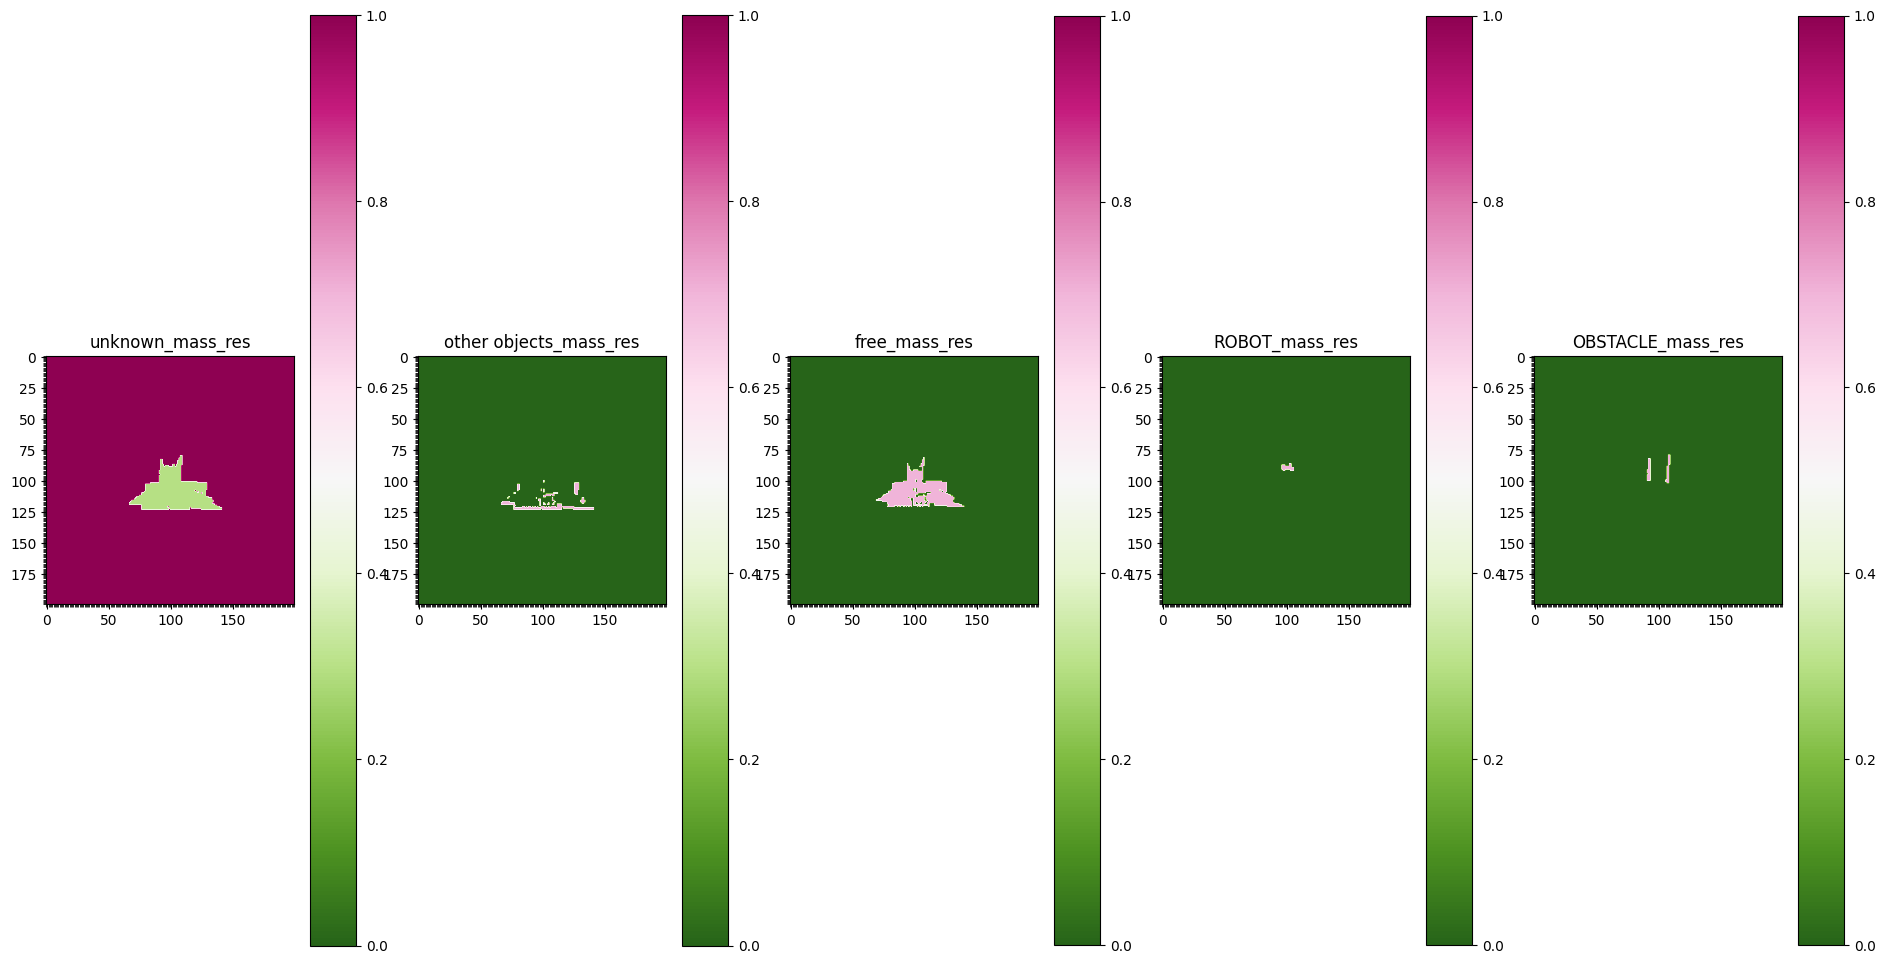

In [12]:
#Visualisation de chaque classe dans la carte d’occupation sémantique à t = 10


xy_res = np.array(new_dgm).shape
carte_21 = new_dgm2[:, :, 0:1]
carte_22 = new_dgm2[:, :, 1:2]
carte_23 = new_dgm2[:, :, 2:3]
carte_24 = new_dgm2[:, :, 3:4]
carte_25 = new_dgm2[:, :, 4:5]

plt.figure(figsize=(28, 16))
plt.subplot(1, 6, 2)
plt.imshow(carte_21[:, :, 0], cmap="PiYG_r")
plt.title('unknown_mass_res')
plt.clim(0, 1)
plt.gca().set_xticks(np.arange(-.5, xy_res[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, xy_res[0], 1), minor=True)
plt.grid(True, which="major", color="b", linewidth=0.2, alpha=0)
plt.colorbar()

plt.subplot(1, 6, 3)
plt.imshow(carte_22[:, :, 0], cmap="PiYG_r")
plt.title('other objects_mass_res')
plt.clim(0, 1)
plt.gca().set_xticks(np.arange(-.5, xy_res[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, xy_res[0], 1), minor=True)
plt.grid(True, which="major", color="b", linewidth=0.5, alpha=0)
plt.colorbar()

plt.subplot(1, 6, 4)
plt.imshow(carte_23[:, :, 0], cmap="PiYG_r")
plt.title('free_mass_res')
plt.clim(0, 1)
plt.gca().set_xticks(np.arange(-.5, xy_res[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, xy_res[0], 1), minor=True)
plt.grid(True, which="major", color="b", linewidth=0.8, alpha=0)
plt.colorbar()

plt.subplot(1, 6, 5)
plt.imshow(carte_24[:, :, 0], cmap="PiYG_r")
plt.title('ROBOT_mass_res')
plt.clim(0, 1)
plt.gca().set_xticks(np.arange(-.5, xy_res[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, xy_res[0], 1), minor=True)
plt.grid(True, which="major", color="b", linewidth=0.8, alpha=0)
plt.colorbar()

plt.subplot(1, 6, 6)
plt.imshow(carte_25[:, :, 0], cmap="PiYG_r")
plt.title('OBSTACLE_mass_res')
plt.clim(0, 1)
plt.gca().set_xticks(np.arange(-.5, xy_res[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, xy_res[0], 1), minor=True)
plt.grid(True, which="major", color="b", linewidth=0.8, alpha=0)
plt.colorbar()


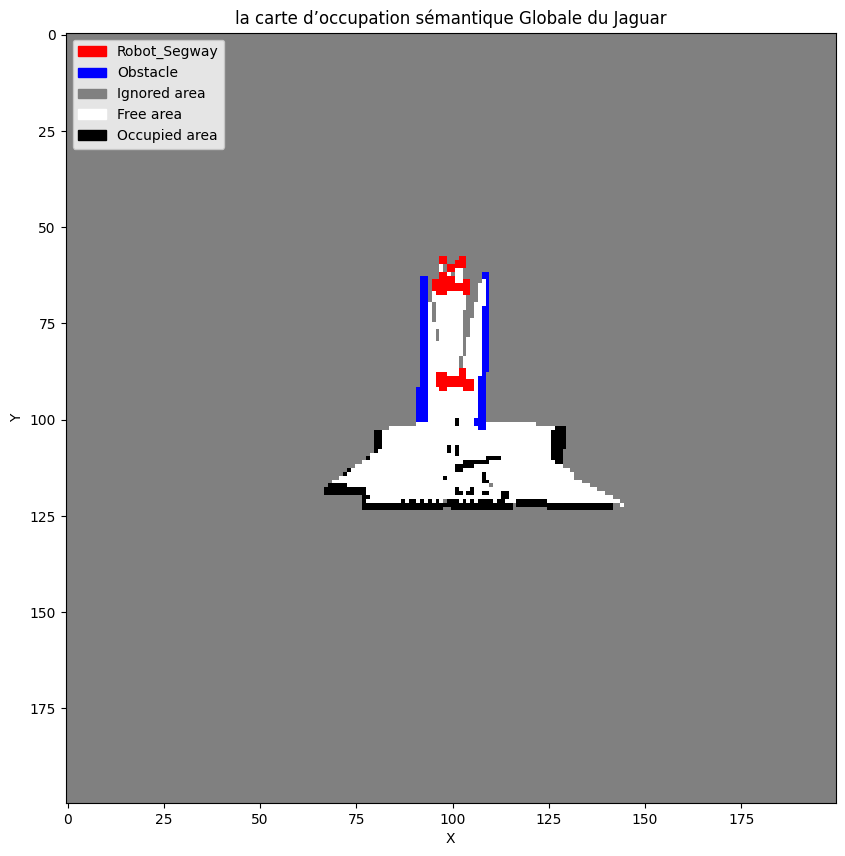

In [19]:
import numpy as np

#Fonction pour fusionner deux carte avec DST
def update_dgm(prior_dgm, new_dgm):
    # Extracting individual masses from the input DGMs
    prior_occ_mass = prior_dgm[:, :, 1]  # Masse d'occupation précédente
    prior_free_mass = prior_dgm[:, :, 2]  # Masse de libre précédente
    prior_unknown_mass = prior_dgm[:, :, 0]  # Masse inconnue précédente
    prior_robot_prob = prior_dgm[:, :, 3]  # Probabilité de présence de robot précédente
    prior_obstacle_prob = prior_dgm[:, :, 4]  # Probabilité d'obstacle précédente

    new_occ_mass = new_dgm[:, :, 1]  # Nouvelle masse d'occupation
    new_free_mass = new_dgm[:, :, 2]  # Nouvelle masse libre
    new_unknown_mass = new_dgm[:, :, 0]  # Nouvelle masse inconnue
    new_robot_prob = new_dgm[:, :, 3]  # Nouvelle probabilité de présence de robot
    new_obstacle_prob = new_dgm[:, :, 4]  # Nouvelle probabilité d'obstacle

    # Calculate conflicting mass
    conflict_mass = (prior_occ_mass * new_free_mass) + (prior_free_mass * new_occ_mass)

    # Calculate free mass
    free_mass = (prior_free_mass * new_free_mass) + (prior_free_mass * new_unknown_mass) + \
                (prior_unknown_mass * new_free_mass)
    free_mass /= (1 - conflict_mass)

    # Calculate occupied mass
    occ_mass = (prior_occ_mass * new_occ_mass) + (prior_occ_mass * new_unknown_mass) + \
               (prior_unknown_mass * new_occ_mass)
    occ_mass /= (1 - conflict_mass)

    # Calculate unknown mass
    unknown_mass = (prior_unknown_mass * new_unknown_mass)
    unknown_mass /= (1 - conflict_mass)

    # Combine robot probability mass
    combined_robot_prob = (prior_robot_prob + new_robot_prob) / 2

    # Combine obstacle probability mass
    combined_obstacle_prob = (prior_obstacle_prob + new_obstacle_prob) / 2

    # Combine all the calculated masses into a single DGM
    fused_dgm = np.stack((unknown_mass, occ_mass, free_mass,  combined_robot_prob, combined_obstacle_prob), axis=2)

    return fused_dgm
fus_dgm = update_dgm (new_dgm2, new_dgm)


#Fonction pour afficher la carte d'occupation sémantique
def predict_dgm2(dgm):
    # Extracting the different elements of the DGM
    unknown_mass = dgm[:, :, 0]
    occ_mass = dgm[:, :, 1]
    free_mass = dgm[:, :, 2]
    robot_prob = dgm[:, :, 3]
    obstacle_prob = dgm[:, :, 4]

    # Initialize the prediction map
    pred_map = np.zeros((dgm.shape[0], dgm.shape[1], 3), dtype=np.uint8)

    # Assigning colors based on the elements of the DGM
    # Rouge pour Robot
    pred_map[robot_prob > obstacle_prob] = (255, 0, 0)
    # Bleu pour Obstacle
    pred_map[obstacle_prob > robot_prob] = (0, 0, 255)
    # Gris pour ignorance
    pred_map[unknown_mass > 0.7] = (128, 128, 128)
    # Blanc pour libre
    pred_map[free_mass > 0.7] = (255, 255, 255)
    # Vert pour Occupe
    pred_map[occ_mass > 0.7] = (0, 255, 0)


    return pred_map
pred_dgm = predict_dgm2(fus_dgm)



#Visualisation de la carte globale sémantique du JAGUAR
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Créer une matrice vide pour stocker les codes de couleur de chaque cellule
colors = np.zeros((fus_dgm.shape[0], fus_dgm.shape[1], 3), dtype=float)
# Définir les couleurs pour chaque type de cellule en fonction de leur fonction de masse
for i in range(fus_dgm.shape[0]):
    for j in range(fus_dgm.shape[1]):
        if np.array_equal(fus_dgm[i, j], [0.3, 0.7, 0, 0.5, 0]):
            colors[i, j] = [1, 0, 0]    # Rouge pour Robot
        elif np.array_equal(fus_dgm[i, j], [0.3, 0.7, 0, 0, 0.5]):
            colors[i, j] = [0, 0, 1]    # Bleu pour Obstacle
        elif np.array_equal(fus_dgm[i, j], [1, 0, 0, 0, 0]):
            colors[i, j] = [0.5, 0.5, 0.5]    # Gris pour Others
        elif np.array_equal(fus_dgm[i, j], [0.3, 0, 0.7, 0, 0]):
            colors[i, j] = [1, 1, 1]    # Blanc pour Others
        elif np.array_equal(fus_dgm[i, j], [0.01, 0.99, 0, 0, 0]):
            colors[i, j] = [0, 0, 0]    # Vert pour Others


# Afficher la grille avec les couleurs attribuées à chaque type de cellule
plt.figure(figsize=(10, 10))
plt.imshow(pred)
plt.title('la carte d’occupation sémantique Globale du Jaguar')
plt.xlabel('X')
plt.ylabel('Y')

# Ajouter une légende pour les couleurs
legend_patches = [
    mpatches.Patch(color='red', label='Robot_Segway'),
    mpatches.Patch(color='blue', label='Obstacle'),
    mpatches.Patch(color='gray', label='Ignored area '),
    mpatches.Patch(color='white', label='Free area'),
    mpatches.Patch(color='black', label='Occupied area')
]

plt.legend(handles=legend_patches, loc='upper left')
plt.show()



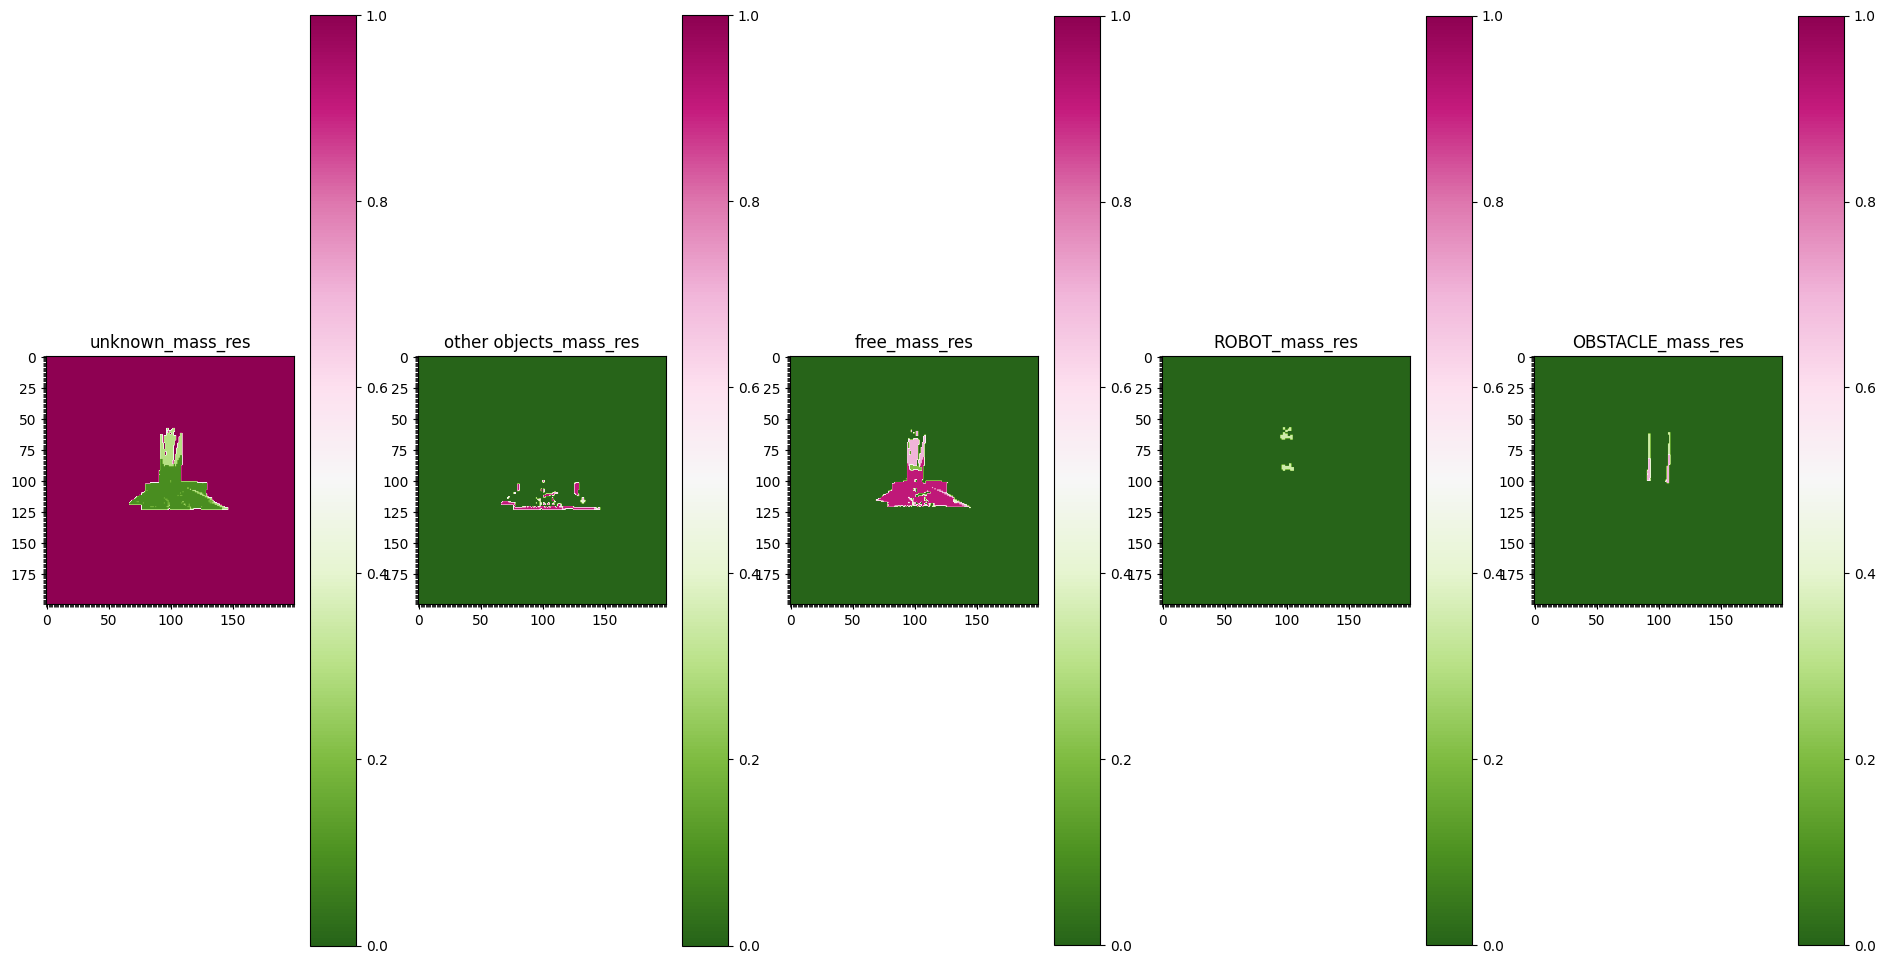

In [9]:
#Visualisation de chaque classe dans la carte d’occupation sémantique Globale du Jaguar



xy_res = np.array(fus_dgm).shape
carte_21 = fus_dgm[:, :, 0:1]
carte_22 = fus_dgm[:, :, 1:2]
carte_23 = fus_dgm[:, :, 2:3]
carte_24 = fus_dgm[:, :, 3:4]
carte_25 = fus_dgm[:, :, 4:5]

plt.figure(figsize=(28, 16))
plt.subplot(1, 6, 2)
plt.imshow(carte_21[:, :, 0], cmap="PiYG_r")
plt.title('unknown_mass_res')
plt.clim(0, 1)
plt.gca().set_xticks(np.arange(-.5, xy_res[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, xy_res[0], 1), minor=True)
plt.grid(True, which="major", color="b", linewidth=0.2, alpha=0)
plt.colorbar()

plt.subplot(1, 6, 3)
plt.imshow(carte_22[:, :, 0], cmap="PiYG_r")
plt.title('other objects_mass_res')
plt.clim(0, 1)
plt.gca().set_xticks(np.arange(-.5, xy_res[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, xy_res[0], 1), minor=True)
plt.grid(True, which="major", color="b", linewidth=0.5, alpha=0)
plt.colorbar()

plt.subplot(1, 6, 4)
plt.imshow(carte_23[:, :, 0], cmap="PiYG_r")
plt.title('free_mass_res')
plt.clim(0, 1)
plt.gca().set_xticks(np.arange(-.5, xy_res[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, xy_res[0], 1), minor=True)
plt.grid(True, which="major", color="b", linewidth=0.8, alpha=0)
plt.colorbar()

plt.subplot(1, 6, 5)
plt.imshow(carte_24[:, :, 0], cmap="PiYG_r")
plt.title('ROBOT_mass_res')
plt.clim(0, 1)
plt.gca().set_xticks(np.arange(-.5, xy_res[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, xy_res[0], 1), minor=True)
plt.grid(True, which="major", color="b", linewidth=0.8, alpha=0)
plt.colorbar()

plt.subplot(1, 6, 6)
plt.imshow(carte_25[:, :, 0], cmap="PiYG_r")
plt.title('OBSTACLE_mass_res')
plt.clim(0, 1)
plt.gca().set_xticks(np.arange(-.5, xy_res[1], 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, xy_res[0], 1), minor=True)
plt.grid(True, which="major", color="b", linewidth=0.8, alpha=0)
plt.colorbar()